# 1. MACHINE LEARNING MODEL




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tadpole-d1-d2/TADPOLE_D1_D2.csv
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/28.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/31.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29 (2).jpg
/kaggle/input/alzheimers-dataset-4-cla

| Column | Meaning |
|----|----|
|RID| Participant roster ID|
|Hippocampus|UCSF Hippocampus-Hippocampus is a complex brain structure embedded deep into temporal lobe|
|Wholebrain|UCSF WholeBrain-Brain volume﻿|
|Fusiform|UCSF Fusiform-The fusiform gyrus is a large gyrus that spans across the basal surface of the temporal and occipital lobes of the cerebral hemispheres|
|MidTemp|UCSF Med Temp-Middle temporal gyrus is a gyrus in the brain on the Temporal lobe|
|Ventricles|UCSF Ventricles-The ventricles of the brain are a communicating network of cavities filled with cerebrospinal fluid (CSF) and located within the brain parenchyma|
|Entorhinal|UCSF Entorhinal-The entorhinal cortex (EC) is an area of the brain's allocortex, located in the medial temporal lobe, whose functions include being a widespread network hub for memory, navigation, and the perception of time. |
|DX|Dx status(AD/NL)|
|DXCHANGE|1=Stable:NL to NL, 2=Stable:MCI to MCI, 3=Stable:AD to AD, 4=Conv:NL to MCI, 5=Conv:MCI to AD, 6=Conv:NL to AD, 7=Rev:MCI to NL, 8=Rev:AD to MCI, 9=Rev:AD to NL, -1=Not available|
|VISCODE|Visit code|

|Mri Measure|Contribution|
|----|----|
|Wholebrain|Alzheimer's disease (AD) is associated with excess whole brain volume loss, and progressive cognitive impairment|
|Hippocampus|The hippocampus is essential for forming new memories, such as what one ate for lunch or a recent conversation. The progressive shrinkage of the hippocampus is responsible for the short-term memory loss that is the hallmark symptom of Alzheimer’s.|
|Fusiform|The fusiform gyrus (FUS) of the brain is critical in facial recognition.Patients with advanced AD frequently lose the ability to identify family members.|
|MidTemp|The middle temporal gyrus and inferior temporal gyrus are involved in a number of cognitive processes|
|Ventricles|In Alzheimer's disease,the ventricles, or chambers within the brain that contain cerebrospinal fluid, are noticeably enlarged.|
|Entorhinal|The entorhinal cortex (Brodmann's area 28) of the ventromedial temporal lobe is an invariant focus of pathology in all cases of Alzheimer's disease with selective changes that alter some layers more than others.|


<b>IMPORT NECESSARY MODULES</b>

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<b>READ DATA</b>

In [3]:
data = pd.read_csv("/kaggle/input/tadpole-d1-d2/TADPOLE_D1_D2.csv", low_memory=False)

In [4]:
data


,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,,,,,,,,,,
1,3,011_S_0003,bl,11,1,0,ADNI1,ADNI1,2005-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
2,3,011_S_0003,m06,11,1,0,ADNI1,ADNI1,2006-03-13,AD,...,,,,,,,,,,
3,3,011_S_0003,m12,11,1,0,ADNI1,ADNI1,2006-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,601.4,251.7,24.18,NaN,2017-04-20 14:39:54.0
4,3,011_S_0003,m24,11,1,0,ADNI1,ADNI1,2007-09-12,AD,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,4167,116_S_4167,m60,116,1,1,ADNI2,ADNI2,2016-11-16,LMCI,...,,,,,,,,,,
12737,4199,116_S_4199,m60,116,1,1,ADNI2,ADNI2,2016-12-12,EMCI,...,,,,,,,,,,
12738,4557,053_S_4557,m60,53,1,1,ADNI2,ADNI2,2017-03-15,EMCI,...,,,,,,,,,,
12739,4512,100_S_4512,m48,100,1,1,ADNI2,ADNI2,2017-04-04,EMCI,...,,,,,,,,,,


In [5]:
data = data.query('VISCODE == "bl" and (DXCHANGE == 1 or DXCHANGE == 3)')
#data.drop(columns=['DXCHANGE'], inplace=True)
data

,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,,,,,,,,,,
1,3,011_S_0003,bl,11,1,0,ADNI1,ADNI1,2005-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
10,5,011_S_0005,bl,11,1,0,ADNI1,ADNI1,2005-09-07,CN,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-11-22,547.3,337,33.43,NaN,2017-04-20 14:39:54.0
20,7,022_S_0007,bl,22,1,0,ADNI1,ADNI1,2005-10-06,AD,...,,,,,,,,,,
22,8,011_S_0008,bl,11,1,1,ADNI1,ADNI1,2005-09-19,CN,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2017-01-06,3592,440.2,37.51,Recalculated ABETA result = 3592 pg/mL,2017-04-20 14:39:54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,5275,135_S_5275,bl,135,1,1,ADNI2,ADNI2,2013-08-27,AD,...,ADNI2,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-20,832.7,490.4,53.18,NaN,2017-04-20 14:39:56.0
10798,5282,082_S_5282,bl,82,1,1,ADNI2,ADNI2,2013-09-09,SMC,...,ADNI2,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-07,558.9,170.7,15.63,NaN,2017-04-20 14:39:56.0
10800,5287,053_S_5287,bl,53,1,1,ADNI2,ADNI2,2013-09-18,SMC,...,ADNI2,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2017-01-18,2358,268.4,26.11,Recalculated ABETA result = 2358 pg/mL,2017-04-20 14:39:56.0
10802,5295,057_S_5295,bl,57,1,1,ADNI2,ADNI2,2013-12-11,SMC,...,ADNI2,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2017-01-13,416.8,88.69,8.53,NaN,2017-04-20 14:39:56.0


In [6]:
trimmedData = data[["RID","Ventricles", "Hippocampus", "WholeBrain", "Entorhinal", "Fusiform", "MidTemp", "DX"]]

In [7]:
trimmedData

,RID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,DX
0,2,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,NL
1,3,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,Dementia
10,5,34062.0,7075.0,1116630.0,4433.0,24788.0,21614.0,NL
20,7,25704.0,6729.0,875798.0,2050.0,12063.0,15374.0,Dementia
22,8,18757.0,6080.0,948684.0,4190.0,14043.0,20076.0,NL
...,...,...,...,...,...,...,...,...
10794,5275,71716.0,6843.0,1146280.0,NaN,NaN,NaN,Dementia
10798,5282,NaN,7851.0,NaN,NaN,NaN,NaN,NL
10800,5287,NaN,5646.0,NaN,NaN,NaN,NaN,NL
10802,5295,NaN,5928.0,NaN,NaN,NaN,NaN,NL


In [8]:
trimmedData.shape

(857, 8)

<b>CHECK AND HANDLE MISSING NAN VALUES</b>

In [9]:
print(trimmedData['Hippocampus'].isnull().sum())
print(trimmedData['WholeBrain'].isnull().sum())
print(trimmedData['Ventricles'].isnull().sum())
print(trimmedData['Entorhinal'].isnull().sum())
print(trimmedData['Fusiform'].isnull().sum())
print(trimmedData['MidTemp'].isnull().sum())
print(trimmedData['DX'].isnull().sum())

112
28
48
133
133
133
0


In [10]:
df = trimmedData.dropna(subset=["DX"])
df = df.dropna()

In [11]:
df

,RID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,DX
0,2,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,NL
1,3,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,Dementia
10,5,34062.0,7075.0,1116630.0,4433.0,24788.0,21614.0,NL
20,7,25704.0,6729.0,875798.0,2050.0,12063.0,15374.0,Dementia
22,8,18757.0,6080.0,948684.0,4190.0,14043.0,20076.0,NL
...,...,...,...,...,...,...,...,...
10758,5228,27258.0,7961.0,1008330.0,3388.0,20407.0,22164.0,NL
10776,5252,44247.0,7301.0,1177300.0,3111.0,17946.0,18920.0,Dementia
10780,5258,26683.0,7116.0,835914.0,2632.0,14804.0,14130.0,NL
10785,5266,33686.0,9192.0,1114540.0,4766.0,19814.0,22400.0,NL


In [12]:
print(df['Hippocampus'].isnull().sum())
print(df['WholeBrain'].isnull().sum())
print(df['Entorhinal'].isnull().sum())
print(df['Fusiform'].isnull().sum())
print(df['MidTemp'].isnull().sum())
print(df['Ventricles'].isnull().sum())

0
0
0
0
0
0


<b>TEST TRAIN SPLIT</b>

In [13]:
X = df[["Ventricles", "Hippocampus", "WholeBrain", "Entorhinal", "Fusiform", "MidTemp"]].values
Y = df[["DX"]].values
Y = Y.reshape(-1)
df

,RID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,DX
0,2,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,NL
1,3,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,Dementia
10,5,34062.0,7075.0,1116630.0,4433.0,24788.0,21614.0,NL
20,7,25704.0,6729.0,875798.0,2050.0,12063.0,15374.0,Dementia
22,8,18757.0,6080.0,948684.0,4190.0,14043.0,20076.0,NL
...,...,...,...,...,...,...,...,...
10758,5228,27258.0,7961.0,1008330.0,3388.0,20407.0,22164.0,NL
10776,5252,44247.0,7301.0,1177300.0,3111.0,17946.0,18920.0,Dementia
10780,5258,26683.0,7116.0,835914.0,2632.0,14804.0,14130.0,NL
10785,5266,33686.0,9192.0,1114540.0,4766.0,19814.0,22400.0,NL


In [14]:
Y = df[['DX']].values

Y

array([['NL'],
       ['Dementia'],
       ['NL'],
       ['Dementia'],
       ['NL'],
       ['Dementia'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['Dementia'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['Dementia'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['Dementia'],
       ['NL'],
       ['Dementia'],
       ['Dementia'],
       ['NL'],
       ['Dementia'],
       ['NL'],
       ['NL'],
       ['Dementia'],
       ['Dementia'],
       ['Dementia'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['Dementia'],
       ['Dementia'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['NL'],
       ['Dementia'],
       ['Dementia'],
       ['Dementia'],
       ['NL'],
       ['NL'],
       ['Dementia'],
       ['NL'],
       

In [15]:
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)
training_set, test_set = train_test_split(df, test_size = 0.1, random_state = 42)

<b>SVM MODEL FIT AND PREDICT</b>

In [16]:
clf = SVC(C=2, kernel="linear").fit(X_train,y_train)
y_pred = clf.predict(X_test)
test_set['Predictions']=y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
test_set[:37]

,RID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,DX,Predictions
2589,1185,40061.0,5549.0,929514.0,2814.0,11646.0,15517.0,Dementia,Dementia
1217,519,42667.0,7749.0,1023400.0,3851.0,18662.0,22669.0,NL,NL
1779,779,40307.0,7831.0,1076430.0,3339.0,19761.0,19031.0,NL,NL
1004,419,25428.0,10769.0,1132010.0,4462.0,20011.0,22605.0,NL,NL
2636,1206,40569.0,7703.0,1137260.0,4381.0,20160.0,23790.0,NL,NL
3617,4155,20708.0,7217.0,936922.0,3436.0,17198.0,18649.0,NL,NL
3519,4080,42088.0,6716.0,979186.0,4122.0,18271.0,19417.0,NL,NL
1317,555,72975.0,8609.0,1180660.0,3342.0,19268.0,24236.0,NL,NL
2958,1373,78443.0,4300.0,798453.0,2486.0,10184.0,9375.0,Dementia,Dementia
4976,5193,22866.0,7229.0,1028560.0,4163.0,16199.0,17703.0,NL,NL


In [18]:
clf.score(X_test, y_test)

0.8405797101449275

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Dementia       0.83      0.65      0.73        23
          NL       0.84      0.93      0.89        46

    accuracy                           0.84        69
   macro avg       0.84      0.79      0.81        69
weighted avg       0.84      0.84      0.83        69



In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8405797101449275


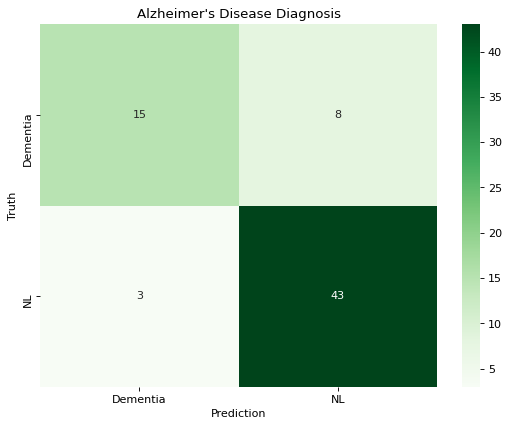

In [21]:

conf_arr = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

CLASSES=[ 'Dementia','NL']
ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

# 2.DETAILED CNN MODEL ON MRI

# IMPORT NECESSARY MODULES

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D



print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.4.1


<b>COPY DATA TO DATASET DIRECTORY</b>
    

In [23]:
base_dir = "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/"
root_dir = "./"
test_dir = base_dir + "test/"
train_dir = base_dir + "train/"
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
    remove_tree(work_dir)
    

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['VeryMildDemented', 'ModerateDemented', 'NonDemented', 'MildDemented']


The image size is: (176, 208)


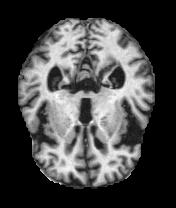

In [24]:
from PIL import Image
# open the image
img = Image.open('../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/mildDem1.jpg')
# Get the image size
img_size = img.size

print("The image size is: {}".format(img_size))

# Just having the image as the last line in the cell will display it in the notebook
img

In [25]:
WORK_DIR = './dataset/'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

IMG_SIZE = 176
IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)

# IMAGE AUGMENTATION

In [26]:
#Performing Image Augmentation to have more data samples

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=6500, shuffle=False)


Found 6400 images belonging to 4 classes.


<b>GENERATE TRAIN DATA AND CORRESPONDING LABELS</b>

In [27]:
#Retrieving the data from the ImageDataGenerator iterator

train_data, train_labels = train_data_gen.next()

In [28]:
#Getting to know the dimensions of our dataset

print(train_data.shape, train_labels.shape)

(6400, 176, 176, 3) (6400, 4)


In [29]:
print(type(train_data))

<class 'numpy.ndarray'>


# OVERSAMPLING FOR IMBALANCED DATA

In [30]:
#Performing over-sampling of the data, since the classes are imbalanced

sm = SMOTE(random_state=42)

In [31]:
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [32]:
print(train_data.shape)
print(train_labels.shape)

(12800, 92928)
(12800, 4)


In [33]:
train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(train_data.shape, train_labels.shape)

(12800, 176, 176, 3) (12800, 4)


<b>Splitting the data into train, test, and validation sets</b>

In [34]:


train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

# BUILD MODEL

In [35]:
def conv_block(filters, act='relu'):
    """Defining  Convolutional NN block for a Sequential CNN model. """
    
    block = Sequential()
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(BatchNormalization())
    block.add(MaxPool2D())
    
    return block

In [36]:
def dense_block(units, dropout_rate, act='relu'):
    """Defining  Dense NN block for a Sequential CNN model. """
    
    block = Sequential()
    block.add(Dense(units, activation=act))
    block.add(BatchNormalization())
    block.add(Dropout(dropout_rate))
    
    return block

In [37]:
def construct_model(act='relu'):
    """Constructing a Sequential CNN architecture for performing the classification task. """
    
    model = Sequential([
        Input(shape=(*IMAGE_SIZE, 3)),
        Conv2D(16, 3, activation=act, padding='same'),
        Conv2D(16, 3, activation=act, padding='same'),
        MaxPool2D(),
        conv_block(32),
        conv_block(64),
        conv_block(128),
        Dropout(0.2),
        conv_block(256),
        Dropout(0.2),
        Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        Dense(4, activation='softmax')        
    ], name = "cnn_model")

    return model

<b>Defining a custom callback function to stop training our model when accuracy goes above 99%</b>


In [38]:


class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()



model = construct_model()

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'), 
           tfa.metrics.F1Score(num_classes=4)]

CALLBACKS = [my_callback]
    
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

Model: "cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 176, 176, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 16)        0         
_________________________________________________________________
sequential (Sequential)      (None, 44, 44, 32)        14016     
_________________________________________________________________
sequential_1 (Sequential)    (None, 22, 22, 64)        55680     
_________________________________________________________________
sequential_2 (Sequential)    (None, 11, 11, 128)       221952    
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)       0 

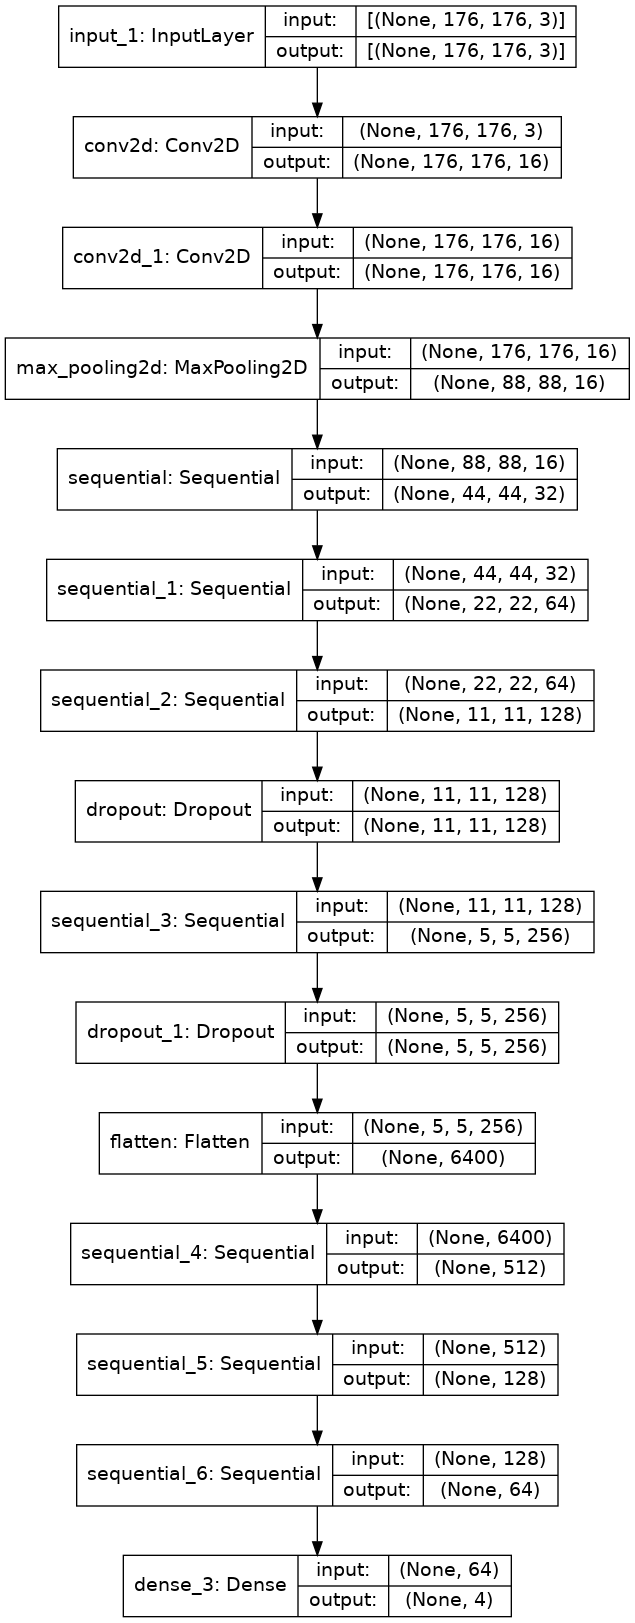

In [39]:
import IPython
import keras

keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model.png')

# FIT MODEL

In [40]:
#Fit the training data to the model and validate it using the validation data
EPOCHS = 96

history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), callbacks=CALLBACKS, epochs=EPOCHS)

Epoch 1/96
256/256 [==============================] - 17s 45ms/step - loss: 1.8075 - acc: 0.2864 - auc: 0.5439 - f1_score: 0.2850 - val_loss: 3.1972 - val_acc: 0.3062 - val_auc: 0.5268 - val_f1_score: 0.2015
Epoch 2/96
256/256 [==============================] - 10s 38ms/step - loss: 1.1373 - acc: 0.4905 - auc: 0.7684 - f1_score: 0.4756 - val_loss: 1.8819 - val_acc: 0.3027 - val_auc: 0.5900 - val_f1_score: 0.2159
Epoch 3/96
256/256 [==============================] - 10s 38ms/step - loss: 0.8760 - acc: 0.5882 - auc: 0.8580 - f1_score: 0.5810 - val_loss: 4.1310 - val_acc: 0.2402 - val_auc: 0.5209 - val_f1_score: 0.0988
Epoch 4/96
256/256 [==============================] - 10s 39ms/step - loss: 0.7948 - acc: 0.6346 - auc: 0.8836 - f1_score: 0.6262 - val_loss: 1.3388 - val_acc: 0.4238 - val_auc: 0.7429 - val_f1_score: 0.3856
Epoch 5/96
256/256 [==============================] - 10s 38ms/step - loss: 0.7056 - acc: 0.6637 - auc: 0.9047 - f1_score: 0.6568 - val_loss: 0.8726 - val_acc: 0.5308 -

# MODEL EVALUATION

In [41]:
#Evaluating the model on the data

#train_scores = model.evaluate(train_data, train_labels)
#val_scores = model.evaluate(val_data, val_labels)
test_scores = model.evaluate(test_data, test_labels)

#print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
#print("Testing Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

80/80 [==============================] - 1s 13ms/step - loss: 0.2364 - acc: 0.9410 - auc: 0.9876 - f1_score: 0.9411
Testing Accuracy: 94.10%


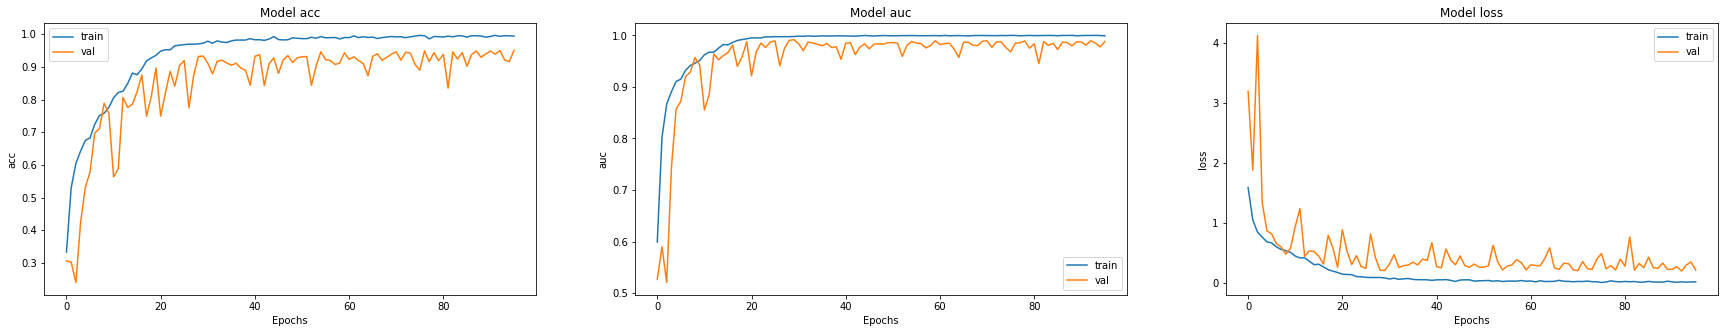

In [42]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

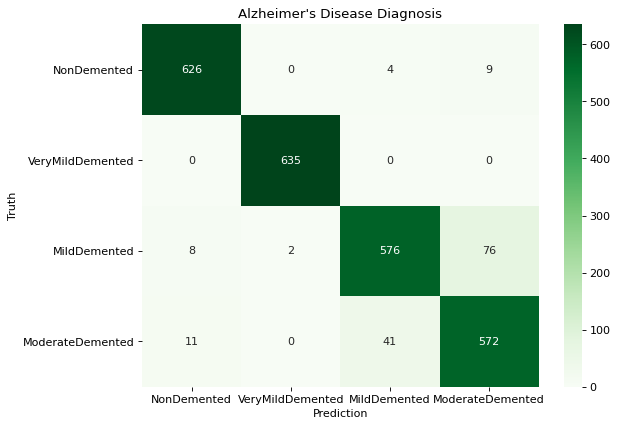

In [43]:
pred_labels = model.predict(test_data)
#Plot the confusion matrix to understand the classification in detail

pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [44]:
#Saving the model for future use

model_dir = work_dir + "alzheimer_cnn_model3"
model.save(model_dir, save_format='h5')
os.listdir(work_dir)

['VeryMildDemented',
 'ModerateDemented',
 'alzheimer_cnn_model3',
 'NonDemented',
 'MildDemented']

In [45]:
#Evaluating the model on the data


val_scores = model.evaluate(val_data, val_labels)


print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))

64/64 [==============================] - 1s 13ms/step - loss: 0.2156 - acc: 0.9507 - auc: 0.9879 - f1_score: 0.9503
Validation Accuracy: 95.07%


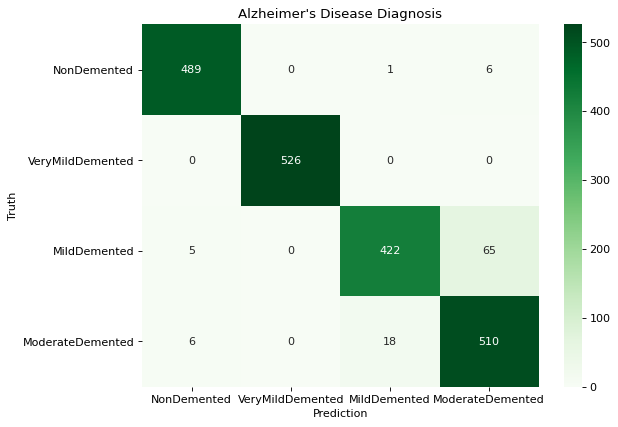

In [46]:
pred_labels = model.predict(val_data)
#Plot the confusion matrix to understand the classification in detail

pred_ls = np.argmax(pred_labels, axis=1)
val_ls = np.argmax(val_labels, axis=1)

conf_arr = confusion_matrix(val_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)